# 🔗 FeatureUnion: Combinare Trasformazioni in Parallelo

In questo notebook usiamo `FeatureUnion` per combinare più trasformazioni delle feature in parallelo:

- StandardScaler: normalizza le feature  
- PCA: riduce la dimensionalità a 2 componenti principali  

Il risultato è una matrice `X_combined` che contiene sia le feature scalate che le componenti PCA.

In [1]:
# Importiamo le librerie necessarie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sns.set(style="whitegrid")

In [2]:
# Caricamento del dataset Iris
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
target_names = iris.target_names

df = pd.DataFrame(X, columns=feature_names)
df["target"] = y
df["class"] = df["target"].map(dict(enumerate(target_names)))
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [3]:
# Train/Test Split
X = df[feature_names]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
# Creazione FutureUnion
union = FeatureUnion([
    ('scaled', StandardScaler()),     # normalizza le feature
    ('pca', PCA(n_components=2))      # aggiunge 2 componenti PCA
])

In [5]:
# Trasformazione combinata
X_combined = union.fit_transform(X_train)

print(f"Shape originale: {X_train.shape}")
print(f"Shape combinata: {X_combined.shape}")

Shape originale: (120, 4)
Shape combinata: (120, 6)


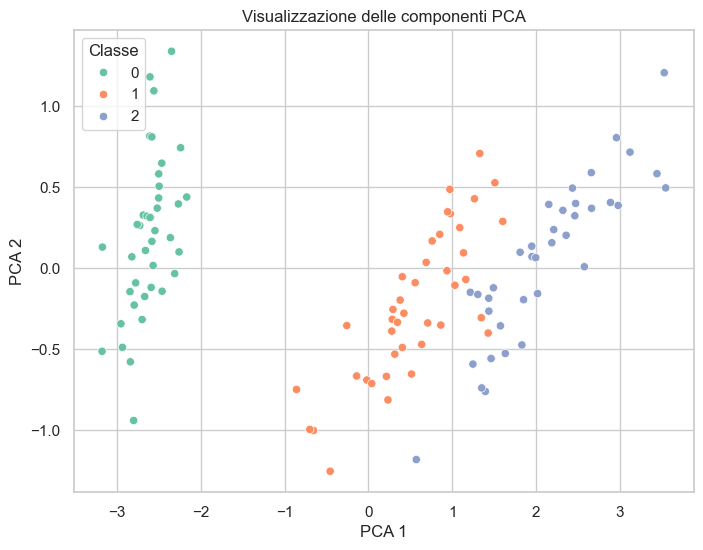

In [6]:
# Estraiamo solo le componenti PCA (ultime 2 colonne)
pca_components = X_combined[:, -2:]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=y_train, palette="Set2")
plt.title("Visualizzazione delle componenti PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Classe")